<a href="https://colab.research.google.com/github/gotkitsana/ann-ex-python/blob/main/ann_cnn_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain[:,:,:,None]/255.
Xtest = Xtest[:,:,:,None]/255.
Xtrain = tf.image.resize(Xtrain, (32,32))
Xtest = tf.image.resize(Xtest, (32,32))


In [5]:
Xtrain.shape

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# LeNet5

In [6]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), input_shape=(32,32,1), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(16, (5,5), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

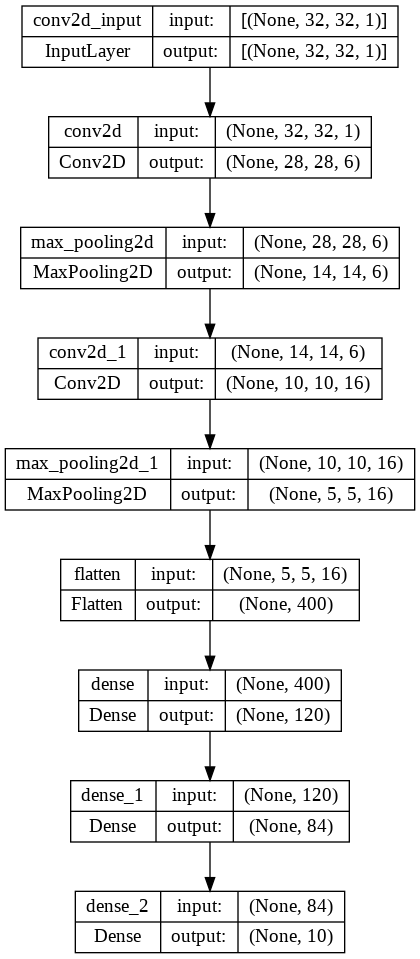

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.fit(Xtrain, Ytrain, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 13s 3ms/step - loss: 0.5913
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1292
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0937
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0749
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0495
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0377
Epoch 11/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0337
Epoch 12/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316


In [10]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)

313/313 [==============================] - 1s 2ms/step


0.9905